In [1]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def get_a(deg_true):
    
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.random.rand(N)
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y




In [3]:
def least_squares_est(X,target_vector):
    if X.shape[0]<= X.shape[1]:
        raise ValueError('number of rows in design matrix less than number of columns')
    else:
        return(np.linalg.inv(X.T@X)@X.T@target_vector)
     
         

In [4]:
def empirical_risk(X, target_vector, coefficients):
    total_risk = sum((target_vector - X@coefficients)**2)
    return(total_risk/len(target_vector))

In [5]:
#Problem 9, estimate b hat from x_train, y_train
a = get_a(2)

x_train,y_train= draw_sample(2,a,10)
x_test, y_test = draw_sample(2,a,1000)
x_train_mat = get_design_mat(x_train,5)
x_test_mat = get_design_mat(x_test,5)

In [6]:
b = least_squares_est(x_train_mat, y_train)

In [7]:
empirical_risk(x_test_mat,y_test,b)

7.137622739811407e-19

In [8]:
def true_func_input (x, degree):
    data = []
    for i in range(degree+1):
        data.append(x**i)
    return(np.array(data))

x = np.linspace(0,1, 1000)

true_func = true_func_input(x,2).T@a
y_pred = x_train_mat @ b

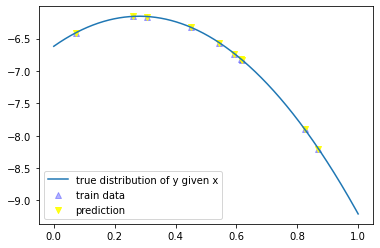

In [9]:
plt.scatter(x_train,y_train, color = 'blue', alpha = .3, marker = '^', label ='train data')
plt.scatter(x_train,y_pred, color = 'yellow', alpha = .9, marker = 'v', label = 'prediction')
plt.plot(x, true_func, linestyle ='-', label = 'true distribution of y given x')
plt.legend()
#notice the overlapping between prediction and train data

In [10]:
#keeping y train and y_test the same, how well would our
#polynomial of degree i fit model a polynomial of degree 5
for i in range(9):
    x_train_mat = get_design_mat(x_train,i)
    x_test_mat = get_design_mat(x_test,i)
    b = least_squares_est(x_train_mat, y_train)
    message = 'The empirical risk of Polyonimal ' + str(i) +' is '
    emp_risk = empirical_risk(x_test_mat,y_test,b)
    print(message + str(round(emp_risk,20)))


The empirical risk of Polyonimal 0 is 0.7748917561580946
The empirical risk of Polyonimal 1 is 0.22531498282751583
The empirical risk of Polyonimal 2 is 0.0
The empirical risk of Polyonimal 3 is 0.0
The empirical risk of Polyonimal 4 is 2e-20
The empirical risk of Polyonimal 5 is 7.1e-19
The empirical risk of Polyonimal 6 is 2.752738e-14
The empirical risk of Polyonimal 7 is 2.91096417905e-09
The empirical risk of Polyonimal 8 is 0.0014845838386789547


In [11]:
#create lists to iterate over for d and n
deg_list = [2,5,10]
n_list = range(12,1001)

#create blank lists to store input vectors
x_train_list =[]
y_train_list = []
y_test_list = []

n_test = 1000

#create blank lists to store input matricies
x_train_mat_list = []
x_test_mat_list = []

#create blank list to store coefficients
coef_list = []

#create test sample we'll be using for the training and testing error
x_train,y_train= draw_sample_with_noise(2,a,1000)
x_test, y_test = draw_sample_with_noise(2,a,n_test)

#create blank list to store training and generalization error

training_error_dict = {}
test_error_dict = {}

for i in range(len(deg_list)):
    #determine the polynomial of the function and the coefficients of g(x)
    deg = deg_list[i]
    
    #create a list that will be re-initialized for each degree we change
    training_error_list = []
    test_error_list = []
    
    

    for j in range(len(n_list)):
        #determine the sample size
        n = n_list[j]
        
        #initialize x_train, y_train, x_test, y_test
 


        #create input matricies
        
        x_train_mat = get_design_mat(x_train[0:n],deg)
        x_test_mat = get_design_mat(x_test,deg)
        
        #append them to matrix list
        x_train_mat_list.append(x_train_mat)
        x_test_mat_list.append(x_test_mat)
        y_train_input =  y_train[0:n]
        #run regression on x_train_mat and y
        b = least_squares_est(x_train_mat, y_train_input)
        

        
        #append coefficients to coef_list
        coef_list.append(b)
        
        #calculate training and testing risk, printing it
        train_emp_risk = empirical_risk(x_train_mat,y_train_input,b)
        
        print('The training empirical risk of Polyonimal ' + str(deg) +' with training sample size '+ str(n) + ' is ' + str(round(train_emp_risk,3)))
        training_error_list.append(train_emp_risk)
        
        print('\n')
        test_emp_risk = empirical_risk(x_test_mat,y_test,b)
        print('The testing empirical risk of Polyonimal ' + str(deg) +' with sample size ' + str(n) + ' is ' + str(round(test_emp_risk,3)))
        print('\n')
        test_error_list.append(test_emp_risk)
        if j == len(n_list)- 1:
            training_error_dict[deg] = training_error_list
            test_error_dict[deg] = test_error_list

The training empirical risk of Polyonimal 2 with training sample size 12 is 0.428


The testing empirical risk of Polyonimal 2 with sample size 12 is 1.236


The training empirical risk of Polyonimal 2 with training sample size 13 is 0.396


The testing empirical risk of Polyonimal 2 with sample size 13 is 1.23


The training empirical risk of Polyonimal 2 with training sample size 14 is 0.455


The testing empirical risk of Polyonimal 2 with sample size 14 is 1.227


The training empirical risk of Polyonimal 2 with training sample size 15 is 0.433


The testing empirical risk of Polyonimal 2 with sample size 15 is 1.229


The training empirical risk of Polyonimal 2 with training sample size 16 is 0.502


The testing empirical risk of Polyonimal 2 with sample size 16 is 1.197


The training empirical risk of Polyonimal 2 with training sample size 17 is 0.569


The testing empirical risk of Polyonimal 2 with sample size 17 is 1.156


The training empirical risk of Polyonimal 2 with trai

The training empirical risk of Polyonimal 2 with training sample size 448 is 0.996


The testing empirical risk of Polyonimal 2 with sample size 448 is 1.024


The training empirical risk of Polyonimal 2 with training sample size 449 is 0.996


The testing empirical risk of Polyonimal 2 with sample size 449 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 450 is 0.993


The testing empirical risk of Polyonimal 2 with sample size 450 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 451 is 0.995


The testing empirical risk of Polyonimal 2 with sample size 451 is 1.024


The training empirical risk of Polyonimal 2 with training sample size 452 is 0.994


The testing empirical risk of Polyonimal 2 with sample size 452 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 453 is 0.992


The testing empirical risk of Polyonimal 2 with sample size 453 is 1.024


The training empirical risk of Polyonima

The training empirical risk of Polyonimal 2 with training sample size 756 is 0.957


The testing empirical risk of Polyonimal 2 with sample size 756 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 757 is 0.956


The testing empirical risk of Polyonimal 2 with sample size 757 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 758 is 0.956


The testing empirical risk of Polyonimal 2 with sample size 758 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 759 is 0.955


The testing empirical risk of Polyonimal 2 with sample size 759 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 760 is 0.956


The testing empirical risk of Polyonimal 2 with sample size 760 is 1.025


The training empirical risk of Polyonimal 2 with training sample size 761 is 0.955


The testing empirical risk of Polyonimal 2 with sample size 761 is 1.025


The training empirical risk of Polyonima

The training empirical risk of Polyonimal 5 with training sample size 75 is 0.909


The testing empirical risk of Polyonimal 5 with sample size 75 is 1.104


The training empirical risk of Polyonimal 5 with training sample size 76 is 0.908


The testing empirical risk of Polyonimal 5 with sample size 76 is 1.111


The training empirical risk of Polyonimal 5 with training sample size 77 is 0.9


The testing empirical risk of Polyonimal 5 with sample size 77 is 1.115


The training empirical risk of Polyonimal 5 with training sample size 78 is 0.938


The testing empirical risk of Polyonimal 5 with sample size 78 is 1.098


The training empirical risk of Polyonimal 5 with training sample size 79 is 0.938


The testing empirical risk of Polyonimal 5 with sample size 79 is 1.088


The training empirical risk of Polyonimal 5 with training sample size 80 is 0.928


The testing empirical risk of Polyonimal 5 with sample size 80 is 1.068


The training empirical risk of Polyonimal 5 with train

The training empirical risk of Polyonimal 5 with training sample size 383 is 1.014


The testing empirical risk of Polyonimal 5 with sample size 383 is 1.033


The training empirical risk of Polyonimal 5 with training sample size 384 is 1.012


The testing empirical risk of Polyonimal 5 with sample size 384 is 1.032


The training empirical risk of Polyonimal 5 with training sample size 385 is 1.01


The testing empirical risk of Polyonimal 5 with sample size 385 is 1.032


The training empirical risk of Polyonimal 5 with training sample size 386 is 1.008


The testing empirical risk of Polyonimal 5 with sample size 386 is 1.032


The training empirical risk of Polyonimal 5 with training sample size 387 is 1.005


The testing empirical risk of Polyonimal 5 with sample size 387 is 1.032


The training empirical risk of Polyonimal 5 with training sample size 388 is 1.005


The testing empirical risk of Polyonimal 5 with sample size 388 is 1.033


The training empirical risk of Polyonimal

The training empirical risk of Polyonimal 5 with training sample size 576 is 0.953


The testing empirical risk of Polyonimal 5 with sample size 576 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 577 is 0.952


The testing empirical risk of Polyonimal 5 with sample size 577 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 578 is 0.952


The testing empirical risk of Polyonimal 5 with sample size 578 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 579 is 0.951


The testing empirical risk of Polyonimal 5 with sample size 579 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 580 is 0.952


The testing empirical risk of Polyonimal 5 with sample size 580 is 1.029


The training empirical risk of Polyonimal 5 with training sample size 581 is 0.951


The testing empirical risk of Polyonimal 5 with sample size 581 is 1.029


The training empirical risk of Polyonimal 5 

The training empirical risk of Polyonimal 5 with training sample size 744 is 0.952


The testing empirical risk of Polyonimal 5 with sample size 744 is 1.029


The training empirical risk of Polyonimal 5 with training sample size 745 is 0.952


The testing empirical risk of Polyonimal 5 with sample size 745 is 1.029


The training empirical risk of Polyonimal 5 with training sample size 746 is 0.951


The testing empirical risk of Polyonimal 5 with sample size 746 is 1.029


The training empirical risk of Polyonimal 5 with training sample size 747 is 0.95


The testing empirical risk of Polyonimal 5 with sample size 747 is 1.029


The training empirical risk of Polyonimal 5 with training sample size 748 is 0.951


The testing empirical risk of Polyonimal 5 with sample size 748 is 1.028


The training empirical risk of Polyonimal 5 with training sample size 749 is 0.953


The testing empirical risk of Polyonimal 5 with sample size 749 is 1.028


The training empirical risk of Polyonimal

The training empirical risk of Polyonimal 5 with training sample size 919 is 0.941


The testing empirical risk of Polyonimal 5 with sample size 919 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 920 is 0.94


The testing empirical risk of Polyonimal 5 with sample size 920 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 921 is 0.939


The testing empirical risk of Polyonimal 5 with sample size 921 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 922 is 0.938


The testing empirical risk of Polyonimal 5 with sample size 922 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 923 is 0.938


The testing empirical risk of Polyonimal 5 with sample size 923 is 1.03


The training empirical risk of Polyonimal 5 with training sample size 924 is 0.938


The testing empirical risk of Polyonimal 5 with sample size 924 is 1.03


The training empirical risk of Polyonimal 5 wit

The training empirical risk of Polyonimal 10 with training sample size 115 is 0.988


The testing empirical risk of Polyonimal 10 with sample size 115 is 1.037


The training empirical risk of Polyonimal 10 with training sample size 116 is 0.985


The testing empirical risk of Polyonimal 10 with sample size 116 is 1.038


The training empirical risk of Polyonimal 10 with training sample size 117 is 0.986


The testing empirical risk of Polyonimal 10 with sample size 117 is 1.037


The training empirical risk of Polyonimal 10 with training sample size 118 is 1.004


The testing empirical risk of Polyonimal 10 with sample size 118 is 1.036


The training empirical risk of Polyonimal 10 with training sample size 119 is 1.021


The testing empirical risk of Polyonimal 10 with sample size 119 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 120 is 1.018


The testing empirical risk of Polyonimal 10 with sample size 120 is 1.036


The training empirical risk 

The testing empirical risk of Polyonimal 10 with sample size 176 is 1.071


The training empirical risk of Polyonimal 10 with training sample size 177 is 0.949


The testing empirical risk of Polyonimal 10 with sample size 177 is 1.065


The training empirical risk of Polyonimal 10 with training sample size 178 is 0.948


The testing empirical risk of Polyonimal 10 with sample size 178 is 1.064


The training empirical risk of Polyonimal 10 with training sample size 179 is 0.947


The testing empirical risk of Polyonimal 10 with sample size 179 is 1.065


The training empirical risk of Polyonimal 10 with training sample size 180 is 0.968


The testing empirical risk of Polyonimal 10 with sample size 180 is 1.075


The training empirical risk of Polyonimal 10 with training sample size 181 is 0.964


The testing empirical risk of Polyonimal 10 with sample size 181 is 1.074


The training empirical risk of Polyonimal 10 with training sample size 182 is 0.968


The testing empirical risk o

The training empirical risk of Polyonimal 10 with training sample size 339 is 0.958


The testing empirical risk of Polyonimal 10 with sample size 339 is 1.056


The training empirical risk of Polyonimal 10 with training sample size 340 is 0.957


The testing empirical risk of Polyonimal 10 with sample size 340 is 1.056


The training empirical risk of Polyonimal 10 with training sample size 341 is 0.954


The testing empirical risk of Polyonimal 10 with sample size 341 is 1.057


The training empirical risk of Polyonimal 10 with training sample size 342 is 0.956


The testing empirical risk of Polyonimal 10 with sample size 342 is 1.058


The training empirical risk of Polyonimal 10 with training sample size 343 is 0.956


The testing empirical risk of Polyonimal 10 with sample size 343 is 1.058


The training empirical risk of Polyonimal 10 with training sample size 344 is 0.954


The testing empirical risk of Polyonimal 10 with sample size 344 is 1.058


The training empirical risk 

The training empirical risk of Polyonimal 10 with training sample size 501 is 0.984


The testing empirical risk of Polyonimal 10 with sample size 501 is 1.037


The training empirical risk of Polyonimal 10 with training sample size 502 is 0.982


The testing empirical risk of Polyonimal 10 with sample size 502 is 1.036


The training empirical risk of Polyonimal 10 with training sample size 503 is 0.982


The testing empirical risk of Polyonimal 10 with sample size 503 is 1.036


The training empirical risk of Polyonimal 10 with training sample size 504 is 0.983


The testing empirical risk of Polyonimal 10 with sample size 504 is 1.036


The training empirical risk of Polyonimal 10 with training sample size 505 is 0.981


The testing empirical risk of Polyonimal 10 with sample size 505 is 1.036


The training empirical risk of Polyonimal 10 with training sample size 506 is 0.979


The testing empirical risk of Polyonimal 10 with sample size 506 is 1.036


The training empirical risk 

The training empirical risk of Polyonimal 10 with training sample size 652 is 0.94


The testing empirical risk of Polyonimal 10 with sample size 652 is 1.031


The training empirical risk of Polyonimal 10 with training sample size 653 is 0.939


The testing empirical risk of Polyonimal 10 with sample size 653 is 1.031


The training empirical risk of Polyonimal 10 with training sample size 654 is 0.937


The testing empirical risk of Polyonimal 10 with sample size 654 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 655 is 0.936


The testing empirical risk of Polyonimal 10 with sample size 655 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 656 is 0.937


The testing empirical risk of Polyonimal 10 with sample size 656 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 657 is 0.938


The testing empirical risk of Polyonimal 10 with sample size 657 is 1.032


The training empirical risk o

The training empirical risk of Polyonimal 10 with training sample size 794 is 0.948


The testing empirical risk of Polyonimal 10 with sample size 794 is 1.034


The training empirical risk of Polyonimal 10 with training sample size 795 is 0.949


The testing empirical risk of Polyonimal 10 with sample size 795 is 1.034


The training empirical risk of Polyonimal 10 with training sample size 796 is 0.947


The testing empirical risk of Polyonimal 10 with sample size 796 is 1.034


The training empirical risk of Polyonimal 10 with training sample size 797 is 0.947


The testing empirical risk of Polyonimal 10 with sample size 797 is 1.034


The training empirical risk of Polyonimal 10 with training sample size 798 is 0.947


The testing empirical risk of Polyonimal 10 with sample size 798 is 1.033


The training empirical risk of Polyonimal 10 with training sample size 799 is 0.946


The testing empirical risk of Polyonimal 10 with sample size 799 is 1.033


The training empirical risk 

The training empirical risk of Polyonimal 10 with training sample size 924 is 0.933


The testing empirical risk of Polyonimal 10 with sample size 924 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 925 is 0.933


The testing empirical risk of Polyonimal 10 with sample size 925 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 926 is 0.932


The testing empirical risk of Polyonimal 10 with sample size 926 is 1.031


The training empirical risk of Polyonimal 10 with training sample size 927 is 0.933


The testing empirical risk of Polyonimal 10 with sample size 927 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 928 is 0.932


The testing empirical risk of Polyonimal 10 with sample size 928 is 1.032


The training empirical risk of Polyonimal 10 with training sample size 929 is 0.932


The testing empirical risk of Polyonimal 10 with sample size 929 is 1.031


The training empirical risk 

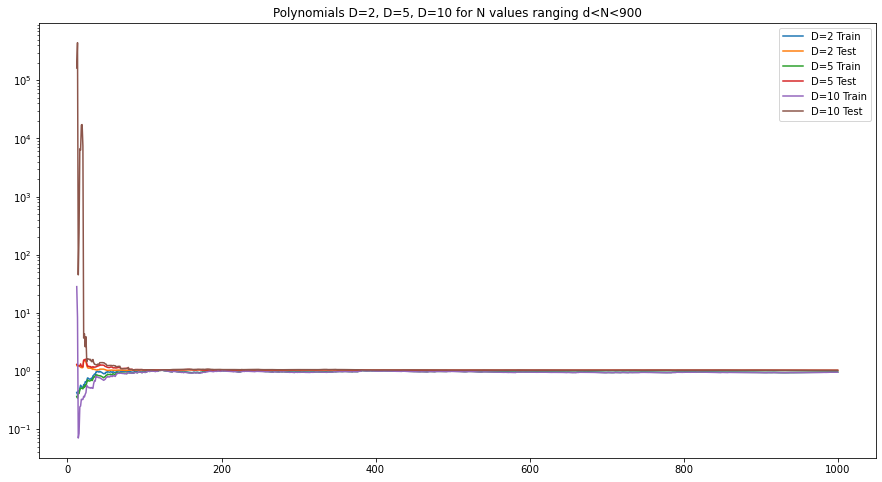

In [12]:
plt.figure(figsize=(15,8))
plt.plot(n_list, training_error_dict[2])

plt.plot(n_list, test_error_dict[2])
plt.plot(n_list, training_error_dict[5])
plt.plot(n_list, test_error_dict[5])
plt.plot(n_list, training_error_dict[10])
plt.plot(n_list, test_error_dict[10])
#plt.plot(n[6:], train_error_arr_5)
#plt.plot(n[6:], test_error_arr_5)
#plt.plot(n[11:], train_error_arr_10)
#plt.plot(n[11:], test_error_arr_10)
plt.legend(labels=['D=2 Train','D=2 Test','D=5 Train', 'D=5 Test', 'D=10 Train','D=10 Test'])
plt.title("Polynomials D=2, D=5, D=10 for N values ranging d<N<900")
plt.yscale('log')


In [47]:
(x_train_mat_list[88] @ a)[1]

-8.645755866490115

In [46]:
y_train[1]

-9.30304475737762

In [58]:
def create_plot_train(n):
    plt.figure(figsize=(15,8))
    index = n-12
    #plot training data
    plt.scatter(x_train[0:n], y_train[0:n], label = 'training data')
    #plot true_function
    #plot different polynomial functions
    y_pred_list =[]
    x = np.linspace(0,1,n)
    x_for_y_pred = true_func_input(x,2).T
    true_y = x_for_y_pred@a

    for i in range(len(x_train_mat_list)//988):
        x_for_y_pred = true_func_input(x,deg_list[i]).T
        y_pred = x_for_y_pred @ coef_list[index + i + 988*i]
        y_pred_list.append(y_pred)
        plt.plot(x,y_pred_list[i], label = 'estimation of true y using polynomial of degree '+ str(deg_list[i]))



    plt.plot(x, true_y[0:n], label= 'true x,y joint distribution')
    plt.legend()
    plt.show()

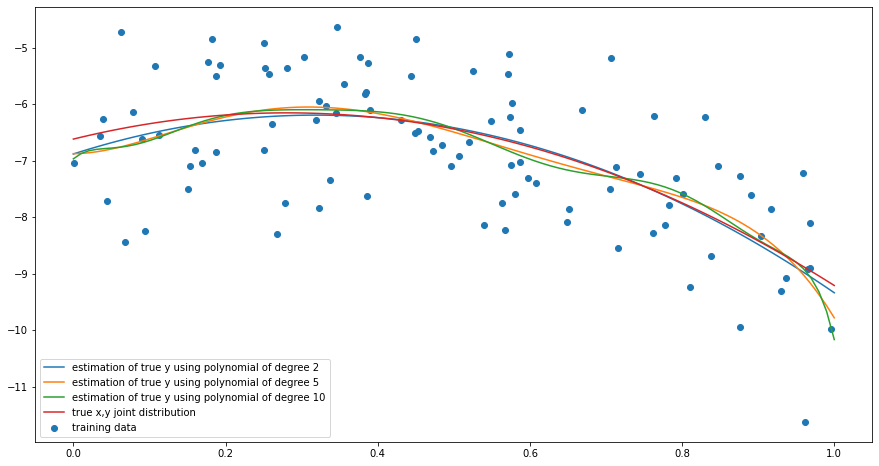

In [59]:
create_plot_train(100)


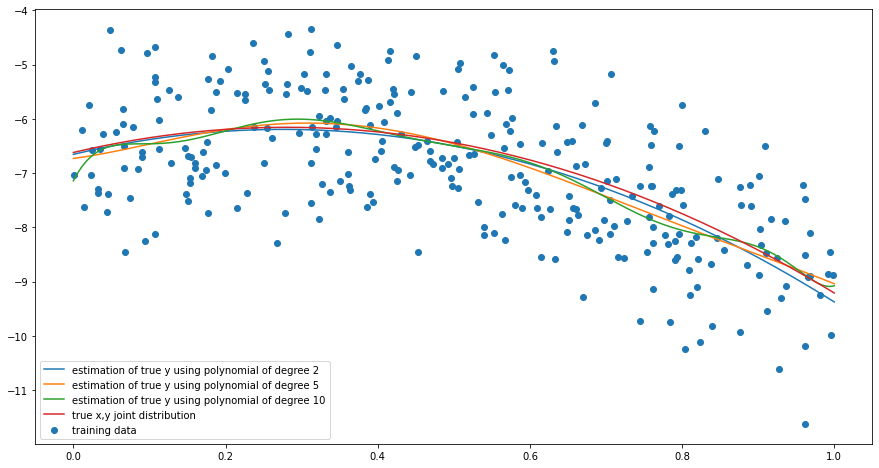

In [60]:
create_plot_train(300)



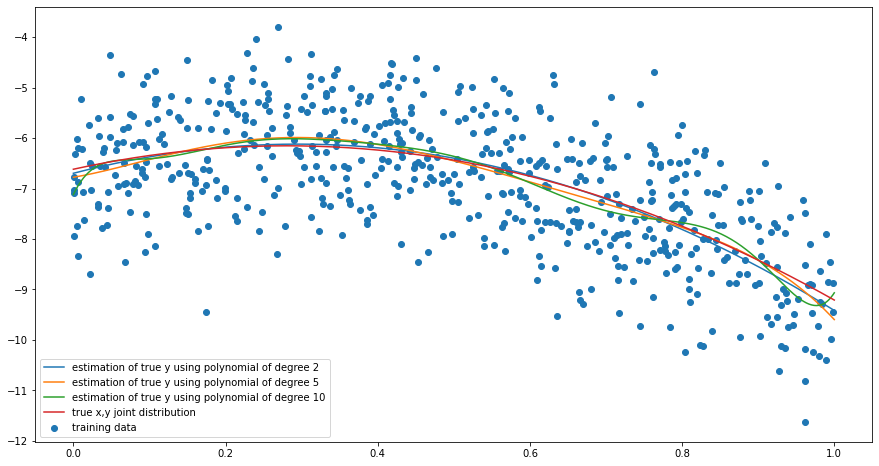

In [61]:
create_plot_train(600)




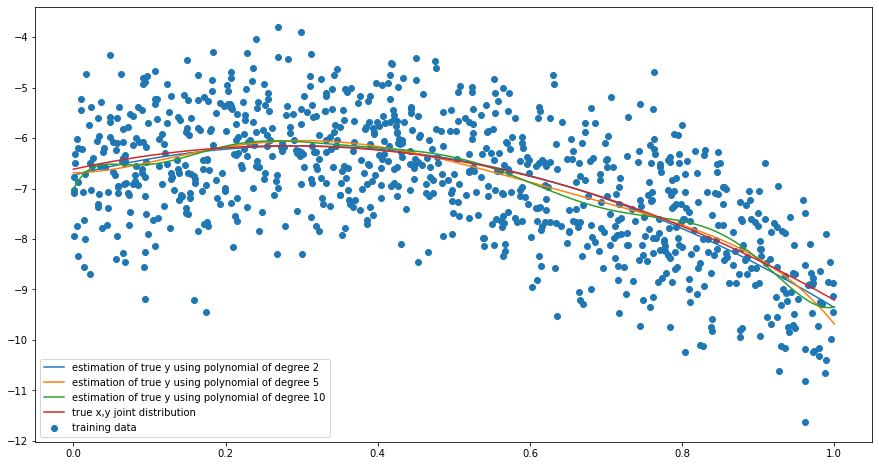

In [62]:
create_plot_train(900)



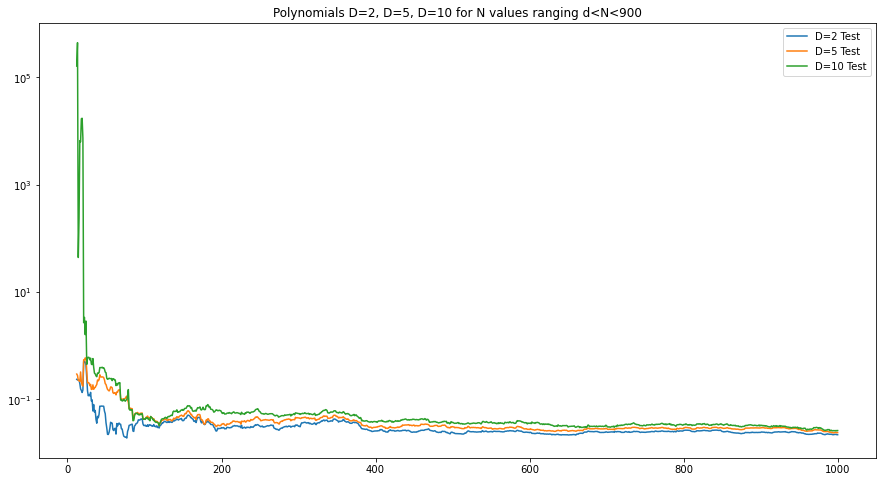

In [64]:

estimation_error_2 = np.array(test_error_dict[2])-1
estimation_error_5 = np.array(test_error_dict[5])-1
estimation_error_10 = np.array(test_error_dict[10])-1




plt.figure(figsize=(15,8))
plt.plot(n_list, np.array(estimation_error_2))
plt.plot(n_list, np.array(estimation_error_5))
plt.plot(n_list, np.array(estimation_error_10))


plt.legend(labels=['D=2 Test', 'D=5 Test', 'D=10 Test'])
plt.title("Polynomials D=2, D=5, D=10 for N values ranging d<N<900")
plt.yscale('log')
